In [1]:
__author__ = "Kaylyn Vo"
__last_updated__ = '1/7/2021'

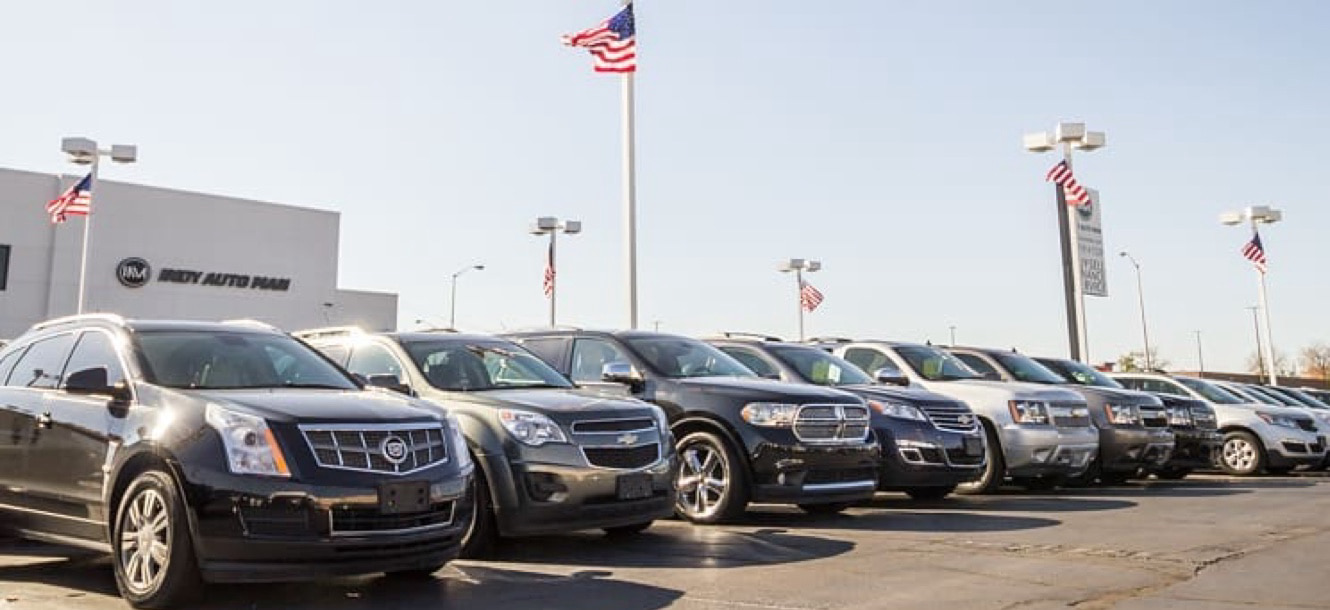

Credit: indyautoman.com

### Table of Contents

* #### [1. Summary](#Summary)
* #### [2. Import Libraries](#Import_Libraries)
* #### [3. About the Data](#About_the_Data_set)
* #### [4. Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [4.A. Quick Examining of the Data](#Quick_Examining)
    * [4.B. Data Cleaning](#Data_Cleaning)
    * [4.C. Handling Missing Values](#Handling_Missing_Values)
    * [4.D. Data Visualizations](#Data_visualizations)
        * [4.D.1 Scatter Plots of Numeric Features](#Scatter_plots)
        * [4.D.2 Distributions Plots](#Distributions)    
* #### [5. Exploring Important/Relevant Features](#Exploring_Important_Features)
    * [5.A. Helper Functions](#Helper_Functions)
    * [5.B. Creating New Features](#Creating_New_Features)
    * [5.C. Checking for Normality Assumptions](#Normality_Assumptions)
    * [5.D. Methods for Deciding Important Features](#Methods)
* #### [6. Modelling](#Modelling)
    * [6.A. Parameters Tuning](#Parameters_Tuning)
    * [6.B. Fitting Possible Models](#Fitting_models)
       * [6.B.1 Ridge Regression](#Ridge_Regression)
       * [6.B.2 Lasso Regression](#Lasso_Regression)
       * [6.B.3 Random Forest Regression](#Random_Forest_Regression)
    * [6.C. Models Diagnostics](#Models_Diagnostics)
       * [6.C.1 Learning Curves](#Learning_curves)
       * [6.C.2 Residuals Plots](#Residuals_plots)
    * [6.D. Predictions](#Predictions)
* #### [7. Conclusion](#Conclusion)       


### 1. Summary <a class="anchor" id="Summary"></a>

For any discerning car buyers, it's often the case that the price of a car depends more than just the make of the car. With this data set, we explore other possible features that are predictive of the price of a car. With this data set, I've gained some knowledge to help me buy a car or some questions that I can ask a car dealer when buying a car. I learned that the average price of a car with rear-wheel drive is higher than a car with front-wheel drive. I learned that the higher the mile per gallon (mpg) the lower the price. I also learned that `make`, `engine size`, `numbers of cylinders`, `width`, and `horse power` are highly correlated with the price. 

We used five different methods - Correlation, Recursive Feature Elimination, Ridge regression, LASSO regression, Random Forest - to study which features can assist in predicting the price. Of course, these methods have different criteria for deciding which features are important. However, they agreed on some common features such as `make`, `engine size`, and `horse power` are important. Instead of choosing one common subset of the features, we let different methods decide their own important features to model the price of a car. 

We used three different learning algorithms- Ridge Regression, Lasso Regression, and Random Forest - to predict the price of a car. Since each learning algorithm have its own strengths and weaknesses, thus we combined the three algorithms into a voting regression to make the final predictions. We didn't use multiple linear regression because there is multicollinearity between the features. Although there is multicollinearity between some features, i.e: engine size and horse power, we believe that these features contributes different aspects of the data. 

Finally, the predictions are only as good as the data that were fed into these learning algorithms. From looking at distribution plots of the categorical variables, there are many features with highly unbalanced classes. For example, the variables `engine location` have two levels- front and gear- with the majority of observations belong to the `front` class and a few belong to the `rear` class. The average prices of these two classes are widely different with the averages of about \\$11,000 and \\$38,000 for `front` and `gear` respectively. Without any context, we would conclude that there is a major difference between these two. Case in point, it is possible that learning algorithms might pick up feautures that they think are important when in fact we don't have enough data to make such conclusion. Thus, we need more data from those features. 

### 2. Libraries <a class="anchor" id="Import_Libraries"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format = 'svg'
from pandas.plotting import scatter_matrix
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

### 3. About the data set <a class="anchor" id="About_the_Data_set"></a>

The data set was taken from UCI Machine Learning repository. According to the creator of the dataset, the data consist of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

In [3]:
cars = pd.read_csv('Automobile_data.csv')

### 4. Exploratory Data Analysis <a class="anchor" id="Exploratory_Data_Analysis"></a>

#### 4.A Quick Looks At The Data <a class="anchor" id="Quick_Examining"></a>

In [4]:
cars.info()
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### 4.B Data Cleaning <a class="anchor" id="Data_Cleaning"></a>

In [5]:
###
### changing '?' to nan
###

for e in cars.columns:
    f = (cars[e]=='?')
    cars.loc[f,e] = np.nan 
    

#### 4.C Missing Values <a class="anchor" id="Handling_Missing_Values"></a>
There are 7 features that have missing values and some observations have more than one missing features. We carefully looked at patterns of missing values of each feature and decided on appropriate imputations to fill in those missing values. 

In [6]:
###
### Missing features
### 

features = cars.columns
missing = {}
for e in features:
    if sum(cars[e].isna()) >0:
        missing[e] = sum(cars[e].isna())
print("Missing features: ",missing)


Missing features:  {'normalized-losses': 41, 'num-of-doors': 2, 'bore': 4, 'stroke': 4, 'horsepower': 2, 'peak-rpm': 2, 'price': 4}


In [7]:
###
### Deciding which variables are categorical and numerical and changing to the correct data type
###


values_d = {'four':'4', 'six':'6' ,'five':'5' ,'three':'3', 'twelve':'12' ,'two':'2' ,'eight':'8'} 
for e in values_d:
    f = cars['num-of-cylinders'] == e
    cars.loc[f,'num-of-cylinders'] = values_d[e]
    
num_features = ['normalized-losses','price','peak-rpm','horsepower','stroke','bore','num-of-cylinders']

cars[num_features] = cars[num_features].astype('float64')



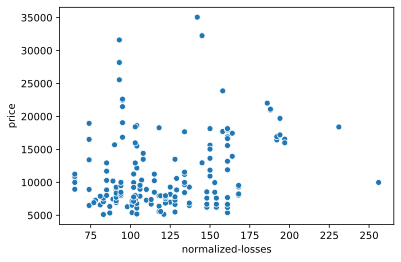

In [8]:
### how the variable relate to price...
sns.scatterplot(cars['normalized-losses'],cars['price']);
### ...not so much

In [9]:
### 
### num-of-doors: both are sedans four doors and a trunk so change nan to 'four'
###
f = cars['num-of-doors'].isna()
cars.loc[f,'num-of-doors'] = 'four'

 
values1_d = {'two':'2','four':'4'}
values1 = cars['num-of-doors'].unique()

for e in values1:
    f = cars['num-of-doors'] ==e
    cars.loc[f,'num-of-doors'] = values1_d[e]
cars['num-of-doors'] = cars['num-of-doors'].astype('int64')
    
    
###
### bore and stroke 
###
f = cars['bore'].isna()
g = cars['make'] =='mazda'


bore_mean = np.mean(cars.loc[g,'bore'])
cars.loc[g&f,'bore'] = round(bore_mean,2)

h = cars['stroke'].isna()
stroke_mean = np.mean(cars.loc[g,'stroke'])
cars.loc[g&h,'stroke'] = round(stroke_mean,2)

In [10]:
###
### horse power
###


f = cars['horsepower'].isna()  ### the two from horsepower and peak-rpm are from renault
h = cars['peak-rpm'].isna()
g = cars['make']=='renault'

horsepower_mean = np.mean(cars['horsepower'])
peak_rpm_mean = np.mean(cars['peak-rpm'])
cars.loc[f&g,'horsepower'] = horsepower_mean
cars.loc[h&g,'peak-rpm'] = peak_rpm_mean


####
#### Price, 4 missing values
####
f = cars['price'].isna()

## 1 porche

make = cars['make'] == 'porsche'
body = cars['body-style'] =='hatchback'
mean = np.mean(cars.loc[make&body,'price'])
cars.loc[f&make&body,'price'] = mean

## 1 audi

f = cars['make'] =='audi'
missing_price = cars['price'].isna()
audi_mean_price = np.mean(cars.loc[f,'price'])
cars.loc[f&missing_price,'price'] = round(audi_mean_price,2)

## 2 isuzu
make = cars['make'] == 'isuzu'
sedan = cars['body-style'] =='sedan'
cars.loc[sedan&make,'price'] = np.mean(cars.loc[sedan&make,'price'])


#### 4.D Data Visualizations <a class="anchor" id="Data_visualizations"></a>

We gaged the importance linear relationships of the features to the response variable. There are seven variables that are more than moderately correlated with the response variable. These variables are: *engine-size, curb_weight, horsepower, width, length, city-mpg, and highway-mpg.* 

In [11]:

### before studying the dataset, split it to training set and validation 
### set using the 80% and 20% rule. 

###
### Split data
###

from sklearn.model_selection import train_test_split

features = list(cars.columns)

cars_train_val, cars_test, y_train_val, y_test = train_test_split(
    cars[features],cars['price'],test_size = 0.1, random_state =42)

cars_train, cars_val, y_train, y_val = train_test_split(
    cars_train_val, y_train_val, test_size=0.20, random_state=42)


#### 4.D.1 Scatter Plots of Numeric Features <a class="anchor" id="Scatter_plots"></a>

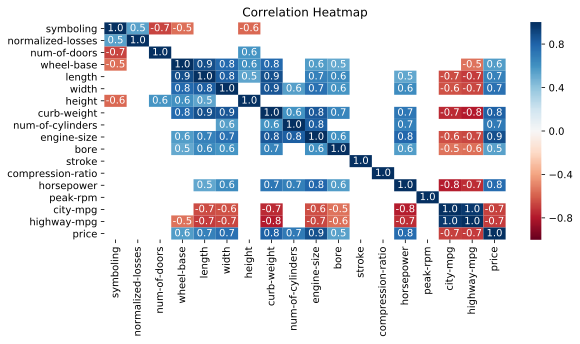

In [12]:
# Create correlation matrix from train data excluding `price`
corr_mat = cars_train.corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(9,4))

ax = sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='RdBu',
            vmin=-1,
           vmax = 1)
title = plt.title('Correlation Heatmap')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);  
# the correlation matrix is cut off from the top and bottom so add 0.5 to each

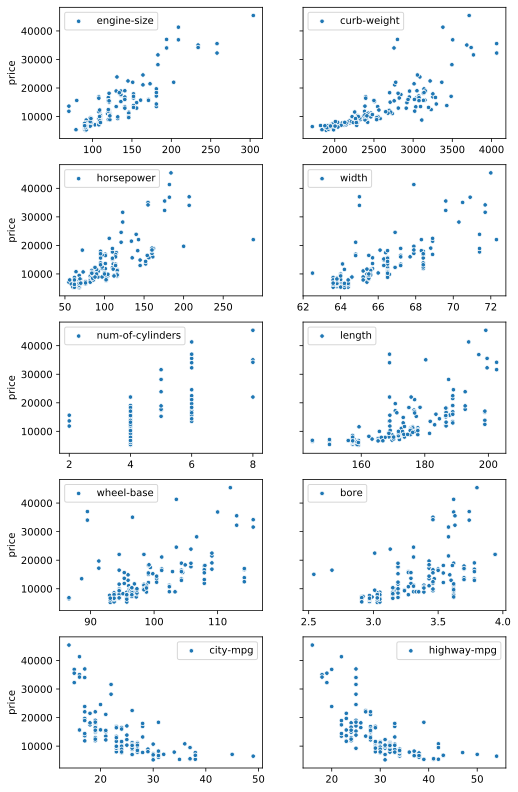

In [13]:
###
### look at at plot of numeric variables
###

high_corr_features = high_corr_mat['price'].sort_values(ascending = False)[1:11].index
      
fig, axes = plt.subplots(5,2, figsize= (8,14), sharex=False, sharey=True)      
k = 0
for i in range(5):
    for j in range(2):
        axes[i,j]=sns.scatterplot(cars_train[high_corr_features[k]],cars_train['price'],
                                  s = 20, ax = axes[i,j],label = high_corr_features[k])
        axes[i,j].set_xlabel('')
        k +=1


There are several variables that are highly correlated with the price. These variables are engine size, curb weight, horsepower, city mpg, and highqay-mpg. 

In [14]:
####
#### get numeric and features of cars
####

features = cars_train.columns
object_vars =[ e for e in features if cars_train[e].dtypes=='object']
num_vars = [e for e in features if cars_train[e].dtypes=='float64']


In [15]:
def ordered_cat(cat_var,reverse=False):
    s = cars_train.groupby(cat_var)['price'].median()
    s.sort_values(axis=0, ascending=reverse, inplace=True)
    return(s.index)

#### 4.D.2 Distributions Plots <a class="anchor" id="Distributions"></a>

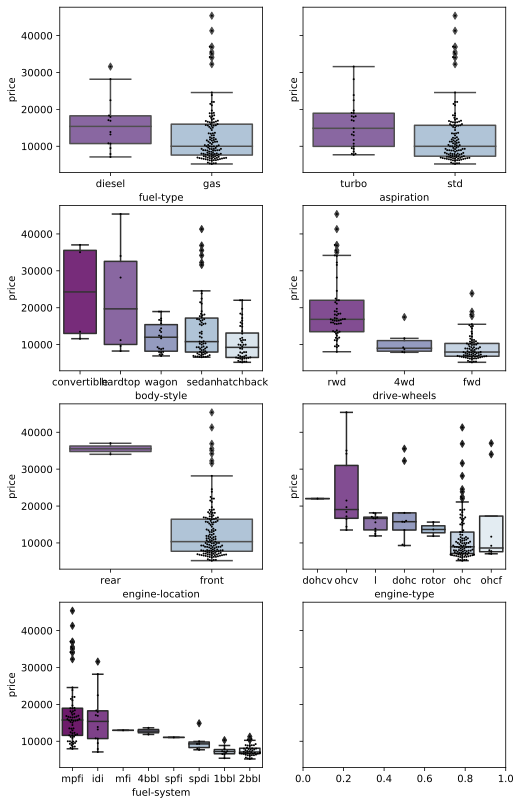

In [16]:
###
### Look at categorical variables, there are 8 categorical variables
###

fig, axes = plt.subplots(4,2, figsize= (8,14), sharex=False, sharey=True)
k = 1   ### start at index 1 because we're excluding the variable make
for i in range(4):
    for j in range(2):
        if k ==8:
            break
        sns.boxplot(cars_train[object_vars[k]], cars_train['price'],ax = axes[i,j],
                    order = ordered_cat(object_vars[k]),palette="BuPu_r");
        sns.swarmplot(cars_train[object_vars[k]], cars_train['price'],ax = axes[i,j],
                    order = ordered_cat(object_vars[k]),color='k',size=2)
        k +=1       

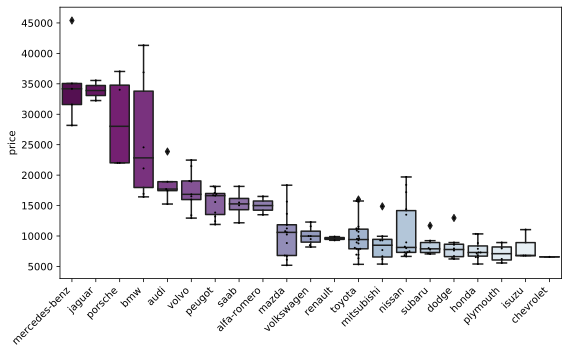

In [17]:
###
### the make variable
###
plt.figure(figsize=(9,5))
ax = sns.boxplot(cars_train['make'], cars_train['price'],
                order = ordered_cat('make'),palette="BuPu_r")
sns.swarmplot(cars_train['make'], cars_train['price'],order = ordered_cat('make'),
              color="black",size=2)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

#### 5. Explore Important/Relevant Features <a class="anchor" id="Exploring_Important_Features"></a>

#### 5.A. Helper Functions <a class="anchor" id="Helper_Functions"></a>

In [18]:
###
### Functions to scale the data and convert categorical variables to dummy variables
###

def scale(X,num_vars):  ## X is the whole training matrix except the response
    '''
    scale the data by minus the average and divide the standard deviation
    '''

    scaler = StandardScaler()

    X[num_vars] = scaler.fit_transform(X[num_vars]) ###
    
    return X[num_vars]


### dummy
def get_dummy(X, obj_vars):
    '''
    manually creating a 0-1 dummy matrix
    '''
    
    X = pd.get_dummies(X,columns = obj_vars, drop_first=True)
    
    return X


def dummy_scale(X,num_vars,object_vars):
    '''
    combining the two functions
    '''
    
    X[num_vars] = scale(X,num_vars)
    
    X = get_dummy(X,object_vars)
    
    return X
        
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def getRMSE(model):
    '''
    Return the average mean squared errors of five fold of training data
    '''
    # Set KFold to shuffle the data before each split
     # either shuffle or not shuffle the data
    kf = KFold(n_folds,shuffle = False, random_state = 42)
   
    # Get RMSE score
    rmse = np.sqrt(-cross_val_score(model, cars_train, price_train,
                                    scoring = 'neg_mean_squared_error', cv = kf))
    
    return rmse.mean()


#import pylab 
import scipy.stats as stats

def qqplot(X,title):
    '''
    Plot distribution of data to access normality
    '''
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].hist(X)
    axes[0].set_title('Distribution Plot of '+title)

    axes[1] = stats.probplot((X), dist="norm",plot=plt)
    plt.title('Probability Plot of ' + title)
    plt.tight_layout()
    
def plot_residuals(y_true,y_pred,model):
    '''
    Plot predictions against residuals
    '''
    sns.scatterplot(x=y_pred,y=y_true-y_pred)
    sns.lineplot(x=y_pred,y=[0]*len(y_pred),c = 'k')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.title('Residuals Plot from '+model)
    
def top_features(df,column_name,n_features=14):
    '''
    Gets the top most important features
    '''
    df_new = df.sort_values(by='Lasso',axis=0,ascending=False)

    return(list(df_new[:n_features].index))

def print_RMSE(series):
    '''
    print out the best lamda through 5-fold cross validation
    '''
    print('Best lambda through 5-fold Cross Validation: ',round(series.idxmin(),4))
    print('RMSE through 5-fold Cross Validation:        ',round(series.min(),4))
    
import sklearn.metrics as metrics

def get_performance_stats(model, y_true, y_pred):
    '''
    Print summary statistics of a given model
    '''
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mse=getRMSE(model) 
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('R-squared:          ', round(r2,4))
    print('5 fold cv RMSE:     ', round(np.sqrt(mse),4))
    
    
def plot_learning_curves(model, X_train, X_val, y_train,y_val):  
    
    train_errors, val_errors = [],[]
  
    for m in range(1, X_train.shape[0],10):
        
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])  # predict on the m training points
        
        y_val_predict = model.predict(X_val)  # predict on the full validation test
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # between 
        
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-", linewidth=1, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")
    plt.legend()

#### 5.B. Creating New Features <a class="anchor" id="Creating_New_Features"></a>

In [19]:
###
### Ratios of related variables
###

### train dataset
cars_train['size_to_weight'] = cars_train['engine-size']/cars_train['curb-weight']
cars_train['width_to_length'] = cars_train['width']/cars_train['length']
cars_train['city_to_highway_mpg'] = cars_train['city-mpg']/cars_train['highway-mpg']

### whole dataset
cars['size_to_weight'] = cars['engine-size']/cars['curb-weight']
cars['width_to_length'] = cars['width']/cars['length']
cars['city_to_highway_mpg'] = cars['city-mpg']/cars['highway-mpg']


In [20]:
features = cars.columns
obj_vars =[ e for e in features if cars_train[e].dtypes=='object']
num_vars = [e for e in features if cars_train[e].dtypes=='float64']
num_vars.remove('price')
num_vars.remove('normalized-losses')
print("Numeric features: ",num_vars)
print()
print("Categorical features: ",obj_vars)

Numeric features:  ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'size_to_weight', 'width_to_length', 'city_to_highway_mpg']

Categorical features:  ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']


#### 5.C. Checking Normality Assumption <a class="anchor" id="Normality"></a>

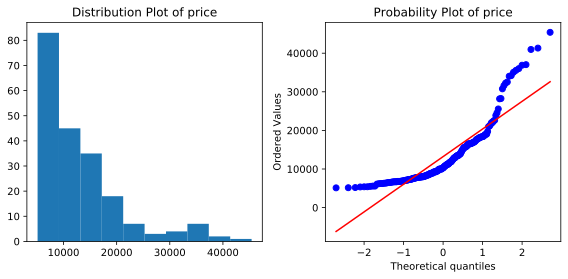

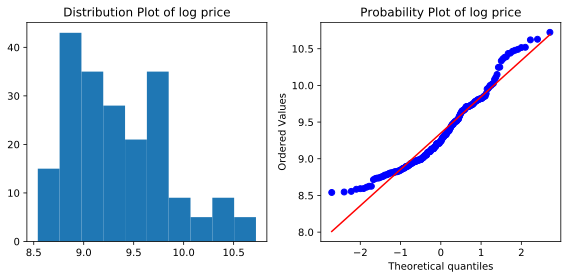

In [21]:
qqplot(cars['price'],title = 'price')    
qqplot(np.log(cars['price']),title = 'log price')

#### 5.D. Methods for Deciding Relevant Features <a class="anchor" id="Methods"></a>

In [22]:
###
### Before parameter tuning or features analysis, split the data into training, validation,
### and testing subsets first
###

cars_prep = dummy_scale(cars[num_vars+obj_vars],num_vars,obj_vars)

cars_train_val, cars_test, price_train_val, price_test = train_test_split(
    cars_prep,np.log(cars['price']),test_size = 0.1, random_state =42)

cars_train, cars_val, price_train, price_val = train_test_split(
    cars_train_val, price_train_val, test_size=0.20, random_state=42)

###
### Checking if we have the right dimensions
###
print("Dimension of train data set:          ",cars_train.shape)
print("Dimension of response train set:      ",price_train.shape)
print("Dimension of validation data set:     ",cars_val.shape)
print("Dimension of response validation set: ",price_val.shape)
print("Dimension of test set:                ",cars_test.shape)
print("Dimension of response test set:       ",price_test.shape)

Dimension of train data set:           (147, 61)
Dimension of response train set:       (147,)
Dimension of validation data set:      (37, 61)
Dimension of response validation set:  (37,)
Dimension of test set:                 (21, 61)
Dimension of response test set:        (21,)


Best lambda through Grid Search:              {'alpha': 0.21151515151515154}
RMSE through Grid Search:                     0.0855
Best lambda through 5-fold Cross Validation:  0.2115
RMSE through 5-fold Cross Validation:         0.1465


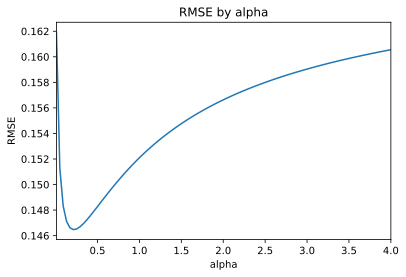

In [23]:
####
#### Performing Grid Search with Ridge Regression
####

from sklearn.model_selection import GridSearchCV


param_grid = [
    {'alpha':list(np.linspace(0.01, 4, 100))}]

ridge_regression = Ridge()

grid_search = GridSearchCV(ridge_regression, param_grid,cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(cars_train, price_train)

ridge_alpha = list(grid_search.best_params_.values())[0]

param_grid_1 = list(np.linspace(0.01, 4, 100))
rmse_ridge = [getRMSE(Ridge(alpha = lambda_)) for lambda_ in param_grid_1]
rmse_ridge = pd.Series(rmse_ridge, index = param_grid_1)

ridge_regression = Ridge(alpha = ridge_alpha)
ridge_regression.fit(cars_train,price_train)
predict = ridge_regression.predict(cars_train)
mse = mean_squared_error(price_train,predict)

rmse_ridge.plot(title = 'RMSE by alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE')

print('Best lambda through Grid Search:             ',grid_search.best_params_)
print('RMSE through Grid Search:                    ',round(np.sqrt(mse),4))
print('Best lambda through 5-fold Cross Validation: ',round(rmse_ridge.idxmin(),4))
print('RMSE through 5-fold Cross Validation:        ',round(rmse_ridge.min(),4))


Best lambda through Grid Search:              {'alpha': 0.0003884784784784785}
RMSE through Grid Search:                     0.0889
Best lambda through 5-fold Cross Validation:  0.0004
RMSE through 5-fold Cross Validation:         0.1452


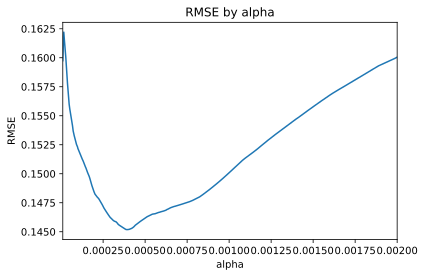

In [24]:

####
#### Performing Grid Search for Lasso Regression
####

param_grid = [
    {'alpha':list(np.linspace(0.00001, 0.002, 1000))}]

lasso_regression = Lasso()

grid_search = GridSearchCV(lasso_regression, param_grid,cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(cars_train, price_train)

lasso_alpha = list(grid_search.best_params_.values())[0]


lasso_regression = Lasso(alpha = lasso_alpha)
lasso_regression.fit(cars_train,price_train)
predict = lasso_regression.predict(cars_train)
mse = mean_squared_error(price_train,predict)


param_grid_1 = list(np.linspace(0.00001, 0.002, 1000))

rmse_lasso = [getRMSE(Lasso(alpha = lambda_)) for lambda_ in param_grid_1]
rmse_lasso = pd.Series(rmse_lasso, index = param_grid_1)

rmse_lasso.plot(title = 'RMSE by alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE')
print('Best lambda through Grid Search:             ',grid_search.best_params_)
print('RMSE through Grid Search:                    ',round(np.sqrt(mse),4))
print('Best lambda through 5-fold Cross Validation: ',round(rmse_lasso.idxmin(),4))
print('RMSE through 5-fold Cross Validation:        ',round(rmse_lasso.min(),4))


#### Deciding Relevant Features

There are 25 predictors in the original data set and it is difficult to decide which variables are actually predictive of the price without domain knowledge; therefore, beside visually inspecting the data through scatter plots and boxplots, we used five different methods to decide the importance of the predictors in predicting the price of a car. We must admit that because we have a lot of predictors, there will be inevitable intercorrelation between predictors. Tus, we will used regularized models and models that don't have parameters to select a few important predictors. We also include a multiple Linear Regression model for comparison. 

The five methods are: 

1) Ridge Regression is a regularized version of Linear Regression which the regularization term is added to the loss function during training. This forces the learning algorithm to not only fit the data while keeping the weights as small as possible. 

2) Lasso Regression: is another regularized version of Linear Regression. It is similar to Ridge Regression but instead of using half the square of l2 norm of the weight vector, it adds the l1 norm of the weight vector to the loss function. 

3) Random Forest: is an instance of bagging where it searches for the best features among a random subset of features. 

4) Recursive feature elimination (RFE): is based on the idea to repeatedly construct a model (for example: ridge regression) and choose either the best or worst performing feature (for example: based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. The stability of RFE depends heavily on the type of model that is used for feature ranking at each iteration. Just as non-regularized regression can be unstable, so can RFE when utilizing it, while using ridge regression can provide more stable results. Sklearn provides RFE for recursive feature elimination and RFECV for finding the ranks together with optimal number of features via a cross validation loop. 

5) Correlation of the predictor with the response.

6) The average of the rank of each feature from the 1-4 methods above. 


In [25]:
####
#### Various techniques to find out importance features
####

names = cars_train.columns
ranks = {}

def rank_to_dict(ranks, names, order=1):
    '''
    This estimator scales and translates each feature individually 
    such that it is in the given range on the training set, e.g. between zero and one.
    '''
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x:round(x,2),ranks)
    return(dict(zip(names,ranks)))

### Linear Regression
lr = LinearRegression()
lr.fit(cars_train,price_train)
ranks['Linear Reg.'] = rank_to_dict(np.abs(lr.coef_),names)


### Ridge
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(cars_train, price_train)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)

### Lasso
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(cars_train, price_train)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)

### Top 10 features will all get score 1, 
### with the rest of the ranks spaced equally betwen their rank
### RFE is done on linear regression here
rfe = RFE(ridge, n_features_to_select=10)
rfe.fit(cars_train, price_train)
ranks["RFE"] = rank_to_dict(list(map(int, rfe.ranking_)), names, order=-1)

#### Random forest
rf = RandomForestRegressor()
rf.fit(cars_train,price_train)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)

### Univariate linear regression tests. 
### Done in two steps: 
### 1) The correlation between each regressor and the target is computed
### 2) It is converted to an F score then to a p-value.

F_score, p_val  = f_regression(cars_train, price_train, center=True)
ranks["Corr."] = rank_to_dict(F_score, names)


r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

#### a list of names of different methods for selecting subsets of features
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

df = pd.DataFrame(ranks)
index = ['Linear Reg.', 'Ridge', 'Lasso', 'RFE','RF','Corr.','Mean']
df = df.reindex(columns = index)

These methods produce different sets of predictors that minimizes the loss function which understandable because they have different criteria for choosing relevant predictors that minimize that loss function. However, a majority of these methods also agree on some important predictors such as *engine size* and *make* variables. The categorical variables are highly unbalanced for some levels. For example, the variable *engine-location* has front and rear levels but the front level dominates the data set and from the boxplots, it seems like the average price for the rear level is higher than the front level, yet we can't arrive to such conclusion because of highly unbalanced data between classes. This phenomenon also occurs in other categorical predictors, such as *engine-type, fuel system, and body-style*, which dominate other levels and so we can't compare the averages of the price for each level through statistical tests. Hence, we can't trust the top ten relevant predictors the five methods gave us since they are only based on data without context; however, for educational purposes only, we will go ahead and allows each method to decide and use their own important predictors for modelling. 

### 6. Modelling <a class="anchor" id="Modelling"></a>

#### 6.A. Parameters Tuning <a class="anchor" id="Parameters_Tuning"></a>

#### Ridge Regression

Best parameter(s) through grid search:  {'alpha': 0.1575757575757576}


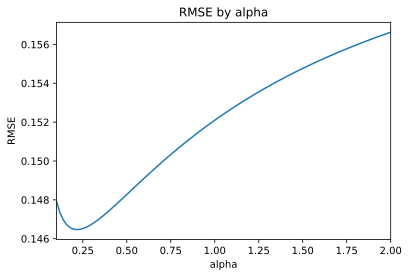

In [26]:

####
#### Performing Grid Search with Ridge Regression
####


from sklearn.model_selection import GridSearchCV

ridge_features = top_features(df,'Ridge')

param_grid = [
    {'alpha':list(np.linspace(0.1, 2, 100))}]

grid_search = GridSearchCV(Ridge(), param_grid,cv=10,scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(cars_train[ridge_features],price_train)

ridge_alpha = round(list(grid_search.best_params_.values())[0],4)

###### Cross Validation

param_grid_1 = list(np.linspace(0.1, 2, 100))
rmse_ridge = [getRMSE(Ridge(alpha = lambda_)) for lambda_ in param_grid_1]
rmse_ridge = pd.Series(rmse_ridge, index = param_grid_1)

rmse_ridge.plot(title = 'RMSE by alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE');

print('Best parameter(s) through grid search: ',grid_search.best_params_)

#### Lasso Regression

Best parameter(s) through grid search:  {'alpha': 0.00010200000000000001}


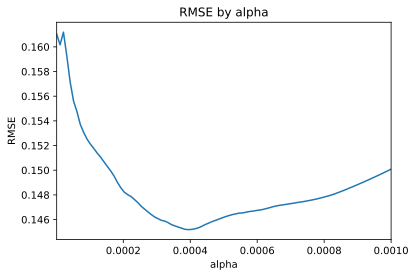

In [27]:
###
### Lasso Regression
###

lasso_features = top_features(df,'Lasso')

param_grid = [
    {'alpha':list(np.linspace(0.000001, 0.01, 100))}]

grid_search = GridSearchCV(Lasso(), param_grid,cv=5,scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(cars_train[lasso_features], price_train)

lasso_alpha = list(grid_search.best_params_.values())[0]

param_grid = list(np.linspace(0.000001, 0.001, 100))

rmse_lasso = [getRMSE(Lasso(alpha = lambda_)) for lambda_ in param_grid]
rmse_lasso = pd.Series(rmse_lasso, index = param_grid)

rmse_lasso.plot(title = 'RMSE by alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE')

print('Best parameter(s) through grid search: ',grid_search.best_params_)


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_features = top_features(df,'RF',10)

param_grid = [
    {'n_estimators':[i for i in range(10,150,5)], 'max_features':[2,4,6,8]}
]

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5,
                           scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(cars_train[rf_features],price_train)

rf_num_features = list(grid_search.best_params_.values())[0]
rf_n_estimators = list(grid_search.best_params_.values())[1]

print('Best parameter(s) through grid search: ',grid_search.best_params_)


Best parameter(s) through grid search:  {'max_features': 2, 'n_estimators': 70}


#### 6.B.1 Ridge Regression <a class="anchor" id="Ridge_Regression"></a>

In [29]:
ridge_regression = Ridge(ridge_alpha)
ridge_regression.fit(cars_train[ridge_features],price_train)
ridge_predictions = ridge_regression.predict(cars_train[ridge_features])
get_performance_stats(ridge_regression,price_train,ridge_predictions)

explained_variance:  0.9307
R-squared:           0.9307
5 fold cv RMSE:      0.3831


#### 6.B.2 Lasso Regression <a class="anchor" id="Lasso_Regression"></a>

In [30]:
lasso_reg = Lasso(lasso_alpha)
lasso_reg.fit(cars_train[lasso_features], price_train)
lasso_predictions = lasso_reg.predict(cars_train[lasso_features])
get_performance_stats(lasso_reg,price_train,lasso_predictions)


explained_variance:  0.931
R-squared:           0.931
5 fold cv RMSE:      0.39


#### 6.B.3 Random Forest Regression <a class="anchor" id="Random_Forest_Regression"></a>

In [31]:
rnd_clf = RandomForestRegressor(max_features = rf_num_features, n_estimators = rf_n_estimators)
rnd_clf.fit(cars_train[rf_features], price_train)
rf_predictions = rnd_clf.predict(cars_train[rf_features])
get_performance_stats(rnd_clf,price_train,rf_predictions)


explained_variance:  0.9781
R-squared:           0.9779
5 fold cv RMSE:      0.3938


### 6.C Models Diagnostics <a class="anchor" id="Models_Diagnostics"></a>

#### 6.C.1 Learning Curve for Each Model <a class="anchor" id="Learning_curves"></a>

#### Ridge Regression

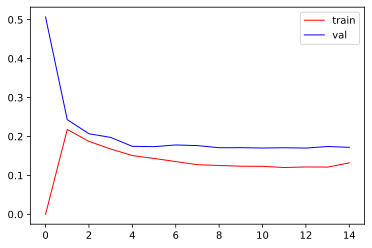

In [32]:
plot_learning_curves(ridge_regression,
                     cars_train[ridge_features],cars_val[ridge_features],price_train,price_val)

#### Lasso Regression

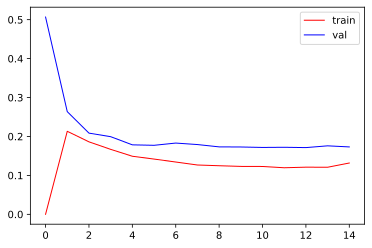

In [33]:
plot_learning_curves(lasso_reg,cars_train[lasso_features],
                     cars_val[lasso_features],price_train,price_val)


#### Random Forest

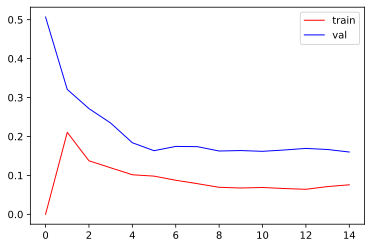

In [34]:
plot_learning_curves(rnd_clf,cars_train[rf_features],cars_val[rf_features],price_train,price_val)

#### 6.C.2 Residuals Plots <a class="anchor" id="Residuals_plots"></a>

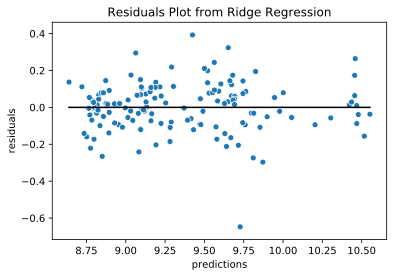

In [35]:
#### Ridge regression
plot_residuals(price_train,ridge_predictions,'Ridge Regression')


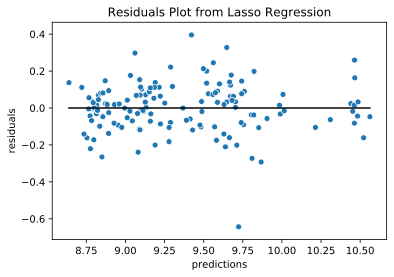

In [36]:
### Lasso Regression
plot_residuals(price_train,lasso_predictions,'Lasso Regression')

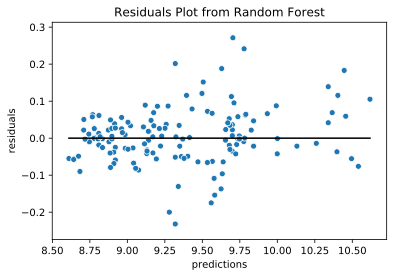

In [37]:
### Random Forest
plot_residuals(price_train,rf_predictions,'Random Forest')

### 6.D Predictions <a class="anchor" id="Predictions"></a>

I will use the combination of all four model to make predictions. I will combine the train and validation data to for parameter tuning one last time to get better parameter estimates before making predictions. 

In [38]:
### Ridge

top_features_ = top_features(df,'Ridge')

cars_train_val = pd.concat([cars_train,cars_val])
price_train_val = pd.concat([price_train,price_val])

param_grid = [
    {'alpha':list(np.linspace(0.1, 1, 50))}]

grid_search = GridSearchCV(Ridge(), param_grid,cv=10,scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(cars_train_val[top_features_],price_train_val)

ridge_alpha = round(list(grid_search.best_params_.values())[0],4)

ridge_regression = Ridge(ridge_alpha)

ridge_regression.fit(cars_train_val[top_features_],price_train_val);


In [39]:
### Lasso

top_features_ = top_features(df,'Lasso')


param_grid = [
    {'alpha':list(np.linspace(0.0000001, 0.00001, 1000))}]

grid_search = GridSearchCV(Lasso(), param_grid,cv=5,scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(cars_train_val[top_features_], price_train_val)


lasso_alpha = list(grid_search.best_params_.values())[0]

lasso_reg = Lasso(lasso_alpha)
lasso_reg.fit(cars_train_val[top_features_],price_train_val);


In [40]:
### Random Forest
param_grid = [
    {'n_estimators':[i for i in range(10,150,5)], 'max_features':[2,4,6,8]}
]

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5,
                           scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(cars_train_val,price_train_val)

rf_num_features = list(grid_search.best_params_.values())[0]
rf_n_estimators = list(grid_search.best_params_.values())[1]
rnd_clf = RandomForestRegressor(max_features = rf_num_features, n_estimators = rf_n_estimators)
rnd_clf.fit(cars_train, price_train);


In [41]:
def predict():
    ridge_regression = Ridge(ridge_alpha)
    ridge_regression.fit(cars_test[ridge_features],price_test)

    lasso_regression = Lasso(lasso_alpha)
    lasso_regression.fit(cars_test[lasso_features],price_test)

    rf = RandomForestRegressor(n_estimators=rf_n_estimators, 
                           max_features = rf_num_features)
    rf.fit(cars_test[rf_features],price_test)
 
    df = {'Ridge_predictions':np.exp(ridge_regression.predict(cars_test[ridge_features])),
    'Lasso_predictions':np.exp(lasso_regression.predict(cars_test[lasso_features])),
    'Rf':np.exp(rf.predict(cars_test[rf_features])),
    'Observations': np.exp(price_test)}

    predictions_df = pd.DataFrame(df,index=cars_test.index)
    label = ['Ridge_predictions','Lasso_predictions','Rf']
    predictions_df['Predictions'] = predictions_df[label].mean(axis=1)
    return(predictions_df[["Predictions",'Observations']])


In [42]:
predict()

,Predictions,Observations
15,28110.180936,30760.00
9,18360.407673,17859.17
100,9531.026802,9549.00
132,12071.201397,11850.00
68,29108.166256,28248.00
95,7211.322688,7799.00
159,7766.872736,7788.00
162,8419.829175,9258.00
147,10785.309932,10198.00
182,7975.773522,7775.00


### 7. Conclusion <a class="anchor" id="Conclusion"></a>

After checking for assumptions of each models, we combined the three models' predictions into  final predictions by averaging the three predictions. From the predicted values, we noticed that there are quite variabilities in the cars with high prices. As seen in the training and validation curves, there is a large gap between the training error and the validation error, this means that we have overfitted the data. We can improve the mean square error by reducing the number features in the models, so that they can generalize better.  